# Sunspots: Data Analysis I 


In [3]:
import numpy as np
from scipy import stats
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

sunspots = sm.datasets.sunspots
dataset_sunspots = sunspots.load_pandas()
df_sunspots = dataset_sunspots.data
df_sunspots_wd = dataset_sunspots.data

## Test ability to call information
print(sunspots.DESCRLONG)
print(sunspots.NOTE)
df_sunspots.info()
df_sunspots.describe()

Yearly (1700-2008) data on sunspots from the National
Geophysical Data Center.
::

    Number of Observations - 309 (Annual 1700 - 2008)
    Number of Variables - 1
    Variable name definitions::

        SUNACTIVITY - Number of sunspots for each year

    The data file contains a 'YEAR' variable that is not returned by load.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309 entries, 0 to 308
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   YEAR         309 non-null    float64
 1   SUNACTIVITY  309 non-null    float64
dtypes: float64(2)
memory usage: 5.0 KB


,YEAR,SUNACTIVITY
count,309.000000,309.000000
mean,1854.000000,49.752104
std,89.344838,40.452595
min,1700.000000,0.000000
25%,1777.000000,16.000000
50%,1854.000000,40.000000
75%,1931.000000,69.800000
max,2008.000000,190.200000


In [75]:
print("Dimensions of imported data:")
df_sunspots.shape

Dimensions of imported data:


(309, 2)

In [76]:
print("Dimensions of working data:")
df_sunspots_wd.shape

Dimensions of working data:


(309, 2)

In [77]:
print(df_sunspots.count())
print('')
print(df_sunspots.isnull())
# results of both show that the non-null value count matches the total amount, therefore there are no null values.

YEAR           309
SUNACTIVITY    309
dtype: int64

      YEAR  SUNACTIVITY
0    False        False
1    False        False
2    False        False
3    False        False
4    False        False
..     ...          ...
304  False        False
305  False        False
306  False        False
307  False        False
308  False        False

[309 rows x 2 columns]


In [78]:
df_sunspots.head(10)

,YEAR,SUNACTIVITY
0,1700.0,5.0
1,1701.0,11.0
2,1702.0,16.0
3,1703.0,23.0
4,1704.0,36.0
5,1705.0,58.0
6,1706.0,29.0
7,1707.0,20.0
8,1708.0,10.0
9,1709.0,8.0


In [79]:
df_sunspots.tail(10)

,YEAR,SUNACTIVITY
299,1999.0,93.3
300,2000.0,119.6
301,2001.0,111.0
302,2002.0,104.0
303,2003.0,63.7
304,2004.0,40.4
305,2005.0,29.8
306,2006.0,15.2
307,2007.0,7.5
308,2008.0,2.9


In [80]:
print('maximum:')
print(df_sunspots.max())
print('')
print('minimum:')
print(df_sunspots.min())
print('')
print('sum:')
print(df_sunspots.sum())
print('')
print(df_sunspots.nlargest(1,'SUNACTIVITY'))
print('')
print(df_sunspots.nsmallest(1,'SUNACTIVITY'))

maximum:
YEAR           2008.0
SUNACTIVITY     190.2
dtype: float64

minimum:
YEAR           1700.0
SUNACTIVITY       0.0
dtype: float64

sum:
YEAR           572886.0
SUNACTIVITY     15373.4
dtype: float64

       YEAR  SUNACTIVITY
257  1957.0        190.2

      YEAR  SUNACTIVITY
11  1711.0          0.0


In [81]:
# top ten largest occurences of sunspots per year
df_sunspots.nlargest(10,'SUNACTIVITY')
# the greatest amount of sunspot occurence took place in the year 1957
# most of these years seem to be in the 1900s

,YEAR,SUNACTIVITY
257,1957.0,190.2
258,1958.0,184.8
259,1959.0,159.0
289,1989.0,157.6
279,1979.0,155.4
280,1980.0,154.6
78,1778.0,154.4
247,1947.0,151.6
291,1991.0,145.7
290,1990.0,142.6


In [82]:
# top ten smallest occurences of sunspots per year
df_sunspots.nsmallest(10,'SUNACTIVITY')
# the smallest amount of sunspot occurence took place in the years 1711, 1712, and 1810.
# understanding: by looking at the years presenting these low quantities of sunspots, these low years seem to occur every hundred years and about a decade after the turn of the century. Could indicate a pattern.

,YEAR,SUNACTIVITY
11,1711.0,0.0
12,1712.0,0.0
110,1810.0,0.0
111,1811.0,1.4
213,1913.0,1.4
123,1823.0,1.8
13,1713.0,2.0
109,1809.0,2.5
201,1901.0,2.7
308,2008.0,2.9


### Reshaping data by adding columns depicting likely sunspot activity by day.

In [5]:
# how many sunspot per day occur each year and how often do they likely occur (assumption made that they occur evenly throughout each year)
df_sunspots_wd['Per Day'] = df_sunspots.SUNACTIVITY/365
df_sunspots_wd['Every X Days'] = 365/df_sunspots.SUNACTIVITY
print(df_sunspots_wd)
df_sunspots_wd.describe()
# 'inf' results from the inability to dvide 365 days by zero sunspot occurences.
# at first I assumed we could state that the maximum for Every X Days between sunspots is 365, being that there are only that many days in a year, but that would only work if an occurence happed the day before the year started and the day after, and we do not know the exact dates.
# instead, I will infer that the maximum is either exactly 365 days or over that amount (likely about 1095 days because during 1711-1713 there were only 2 occurences total, and they were in 1713, meaning that the lack of occurences could only have gone about 3 years).

       YEAR  SUNACTIVITY   Per Day  Every X Days
0    1700.0          5.0  0.013699     73.000000
1    1701.0         11.0  0.030137     33.181818
2    1702.0         16.0  0.043836     22.812500
3    1703.0         23.0  0.063014     15.869565
4    1704.0         36.0  0.098630     10.138889
..      ...          ...       ...           ...
304  2004.0         40.4  0.110685      9.034653
305  2005.0         29.8  0.081644     12.248322
306  2006.0         15.2  0.041644     24.013158
307  2007.0          7.5  0.020548     48.666667
308  2008.0          2.9  0.007945    125.862069

[309 rows x 4 columns]


,YEAR,SUNACTIVITY,Per Day,Every X Days
count,309.000000,309.000000,309.000000,309.000000
mean,1854.000000,49.752104,0.136307,inf
std,89.344838,40.452595,0.110829,NaN
min,1700.000000,0.000000,0.000000,1.919033
25%,1777.000000,16.000000,0.043836,5.229226
50%,1854.000000,40.000000,0.109589,9.125000
75%,1931.000000,69.800000,0.191233,22.812500
max,2008.000000,190.200000,0.521096,inf


## Visualizations and Descriptive Statistics, with Old Journal Entries.

Question 1______________________________________________________________________________________________________________Trend

In [84]:
## What is the total amount of sunspot activities over the last 300 years?
df_last300sunspots = df_sunspots.tail(299)
df_last300sunspots.sum()
# Over the last 300 years there has been over 15,000 recorded instances of sunspot activity.

YEAR            5.558410e+05
SUNACTIVITY     1.515740e+04
Per Day         4.152712e+01
Every X Days             inf
dtype: float64

<AxesSubplot:xlabel='YEAR'>

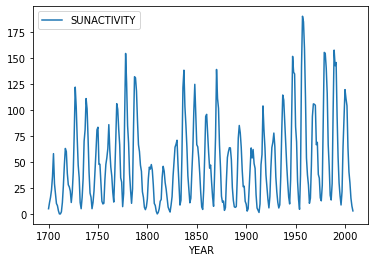

In [85]:
df_sunspots.plot(x='YEAR' , y='SUNACTIVITY')
# inference: Over the last 300 hundred years, there has been a stead cyclical increase to the number of sunactivites observed.

Question 2________________________________________________________________________________________________________Relationships

In [86]:
## What is the average number of Sunspot activities per year?
df_sunspots.mean()
# We found that the average number of sunspot activities recorded were about 50 instances per year over the last 300 years.

YEAR            1854.000000
SUNACTIVITY       49.752104
Per Day            0.136307
Every X Days            inf
dtype: float64

<AxesSubplot:xlabel='YEAR', ylabel='SUNACTIVITY'>

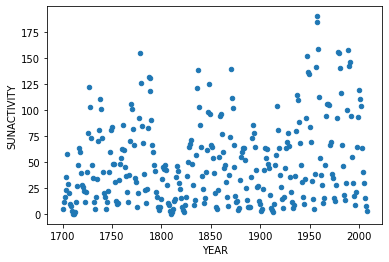

In [87]:
# early scatter plot of what the data looks like unaltered
df_sunspots.plot.scatter(x='YEAR' ,y='SUNACTIVITY')
# inference: possible upward cyclic trend of dipping quantity of sunspots every 50 years but still increasing in quatity.

<AxesSubplot:xlabel='YEAR', ylabel='Per Day'>

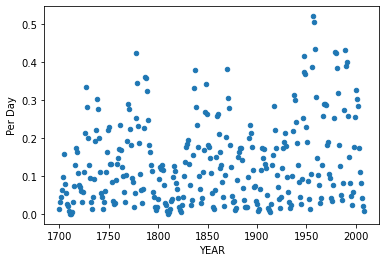

In [88]:
df_sunspots_wd.plot.scatter(x='YEAR' ,y='Per Day')

<AxesSubplot:xlabel='YEAR', ylabel='Every X Days'>

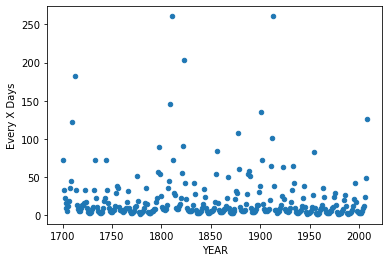

In [89]:
df_sunspots_wd.plot.scatter(x='YEAR' ,y='Every X Days')
# this plot, showing how long it likely took for sunspot occurence to occur, inversely correlates with the previous plot.
# inference: this makes sense that the years with the smallest amount of sunspots would have the largest periods inbetween sunspot occurences, and appears to also have a cyclical pattern.

Question 3___________________________________________________________________________________________________________Comparison

In [90]:
## Has activity been increasing? (Look at every fifty years)
df_1stPeriodsunspots = df_sunspots.head(49)
df_2ndPeriodsunspots = df_sunspots.iloc[50:100]
df_3rdPeriodsunspots = df_sunspots.iloc[101:151]
df_4thPeriodsunspots = df_sunspots.iloc[152:202]
df_5thPeriodsunspots = df_sunspots.iloc[203:253]
df_6thPeriodsunspots = df_sunspots.iloc[254:308]

print('First Fifty Years of the Study:')
print(df_1stPeriodsunspots.sum())
print('')

print('Second Fifty Years of the Study:')
print(df_2ndPeriodsunspots.sum())
print('')

print('Third Fifty Years of the Study:')
print(df_3rdPeriodsunspots.sum()) 
print('')

print('Fourth Fifty Years of the Study:')
print(df_4thPeriodsunspots.sum())
print('')

print('Fifth Fifty Years of the Study:')
print(df_5thPeriodsunspots.sum())
print('')

print('Sixth Fifty Years of the Study:')
print(df_6thPeriodsunspots.sum()) 
# We found that there was a large increase in supspot activity from the first 50 years to the second 50 years, and an even larger increase in the last 50 years.

First Fifty Years of the Study:
YEAR            84476.00000
SUNACTIVITY      1790.00000
Per Day             4.90411
Every X Days            inf
dtype: float64

Second Fifty Years of the Study:
YEAR            88725.000000
SUNACTIVITY      2698.400000
Per Day             7.392877
Every X Days      749.818565
dtype: float64

Third Fifty Years of the Study:
YEAR            9.127500e+04
SUNACTIVITY     2.052000e+03
Per Day         5.621918e+00
Every X Days             inf
dtype: float64

Fourth Fifty Years of the Study:
YEAR            93825.000000
SUNACTIVITY      2136.700000
Per Day             5.853973
Every X Days     1122.055311
dtype: float64

Fifth Fifty Years of the Study:
YEAR            96375.000000
SUNACTIVITY      2565.900000
Per Day             7.029863
Every X Days     1054.277586
dtype: float64

Sixth Fifty Years of the Study:
YEAR            106947.000000
SUNACTIVITY       3948.700000
Per Day             10.818356
Every X Days       633.977921
dtype: float64


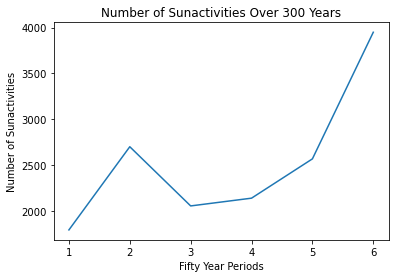

In [91]:
## manual creation of graph respresenting the data depicted above
x = [1,2,3,4,5,6]
y = [1790.0,2698.4,2052.0,2136.7,2565.9,3948.7]
plt.plot(x,y)
plt.xlabel('Fifty Year Periods')
plt.ylabel('Number of Sunactivities')
plt.title('Number of Sunactivities Over 300 Years')
plt.show()
# inference: the number of sunactivities have been greatly increasing over the past 300 hundred years, which could be due solely to the increase in activity or also the improved ability of researchers to detect this information

Addtional Question___________________________________________________________________________________________Trend & Comparison

In [92]:
# finding sunactivity of a the first 12 years of the study for comparison to the last 12 years of the study.
print('For comparison to the last 12 year, the first 12 years of the study:')
print('')
print(df_sunspots.head(12))
first = df_sunspots.head(12)
print('')
print('The total number of sunspot activity occureneces in the first 12 years of the study was:')
print(first.sum())
# from these results, we can see that the number of occurences in the first dozen years of the study are significantly lower than the last dozen years of the study.
# inference: we cannot say for sure what the cause of thsi significant increase is, but possible causes could be an environmental shift around the sun, the age of the sun affecting its output, or simply an improvemnet to detecting these occurences.
# Additionally, the way sunspots have been observed has changed, as 300 years ago the individuals observing the study did not record partial (decimal value) occurences, which are utilized in later recordings. The reason for this not known, but I would infer that it has to do with a change in how the occurences are classified and observed.
# After utilizing the head() function, it was found that the first decimal value is observed about fifty years into the study.

For comparison to the last 12 year, the first 12 years of the study:

      YEAR  SUNACTIVITY   Per Day  Every X Days
0   1700.0          5.0  0.013699     73.000000
1   1701.0         11.0  0.030137     33.181818
2   1702.0         16.0  0.043836     22.812500
3   1703.0         23.0  0.063014     15.869565
4   1704.0         36.0  0.098630     10.138889
5   1705.0         58.0  0.158904      6.293103
6   1706.0         29.0  0.079452     12.586207
7   1707.0         20.0  0.054795     18.250000
8   1708.0         10.0  0.027397     36.500000
9   1709.0          8.0  0.021918     45.625000
10  1710.0          3.0  0.008219    121.666667
11  1711.0          0.0  0.000000           inf

The total number of sunspot activity occureneces in the first 12 years of the study was:
YEAR            20466.0
SUNACTIVITY       219.0
Per Day             0.6
Every X Days        inf
dtype: float64


In [93]:
## How does the sunactivity at the start of the study compare to the end of the study?
# finding sunactivity of a specfic year and total sunactivity since the start of that year (1997)
print('In 1997, there were ', df_sunspots.iloc[297,1], ' occurences of sunspots.')
print('')
print(df_sunspots.tail(12))
last = df_sunspots.tail(12)
print('')
print('The total number of sunspot activity occureneces in the last 12 years of the study was:')
print(last.sum())

In 1997, there were  21.5  occurences of sunspots.

       YEAR  SUNACTIVITY   Per Day  Every X Days
297  1997.0         21.5  0.058904     16.976744
298  1998.0         64.3  0.176164      5.676516
299  1999.0         93.3  0.255616      3.912111
300  2000.0        119.6  0.327671      3.051839
301  2001.0        111.0  0.304110      3.288288
302  2002.0        104.0  0.284932      3.509615
303  2003.0         63.7  0.174521      5.729984
304  2004.0         40.4  0.110685      9.034653
305  2005.0         29.8  0.081644     12.248322
306  2006.0         15.2  0.041644     24.013158
307  2007.0          7.5  0.020548     48.666667
308  2008.0          2.9  0.007945    125.862069

The total number of sunspot activity occureneces in the last 12 years of the study was:
YEAR            24030.000000
SUNACTIVITY       673.200000
Per Day             1.844384
Every X Days      261.969969
dtype: float64


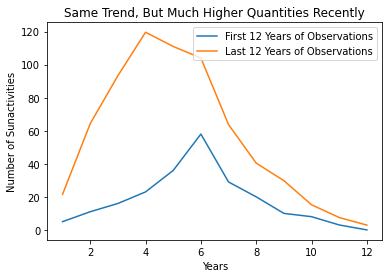

In [94]:
x = [1,2,3,4,5,6,7,8,9,10,11,12]
y1 =[5.0,11.0,16.0,23.0,36.0,58.0,29.0,20.0,10.0,8.0,3.0,0.0]
y2 = [21.5,64.3,93.3,119.6,111.0,104.0,63.7,40.4,29.8,15.2,7.5,2.9]
plt.plot(x, y1, label = "First 12 Years of Observations")
plt.plot(x, y2, label = "Last 12 Years of Observations")
plt.xlabel('Years')
plt.ylabel('Number of Sunactivities')
plt.title('Same Trend, But Much Higher Quantities Recently')
plt.legend()
# inference: Although the trend is similar (backing up the possibility that there is a trend lasting fifty years- that could have something to do with planetary position), the quantity of activities observed is much higher now.
# There is still no concrete evidence as to why this is, but I believe it has to do with the increase in technological advancements.

# Assignment 4

Hypothesis Testing


In [95]:
from scipy.stats import shapiro
series_2test = df_sunspots[['SUNACTIVITY']]
stat, p = shapiro(series_2test)
print('stat=%.3f, p=%.3f' % (stat, p))
if p > 0.05:
    print('Probably Gaussian')
else:
    print('Probably not Gaussian')

stat=0.909, p=0.000
Probably not Gaussian


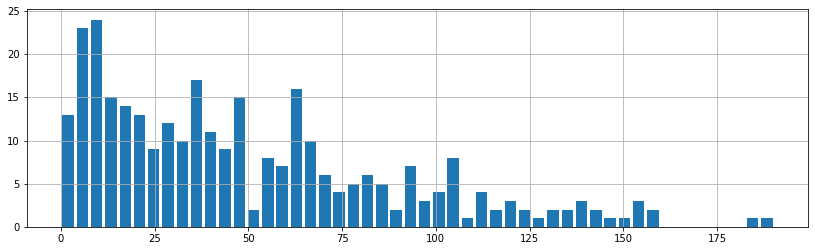

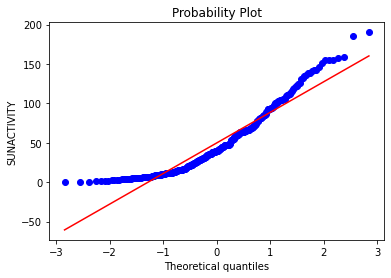

C:\Users\Nicole Marie\anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
C:\Users\Nicole Marie\anaconda3\lib\site-packages\numpy\lib\function_base.py:2474: RuntimeWarning: invalid value encountered in subtract
  X -= avg[:, None]


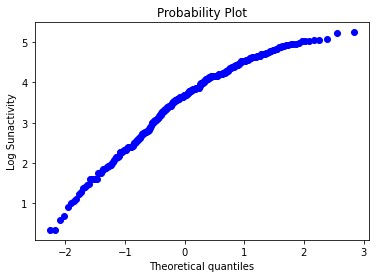

In [96]:
df_sunspots['SUNACTIVITY'].hist(bins=50, rwidth=.8, figsize=(14,4))
plt.show()
df_sunspots['SUNACTIVITY'].describe()

stats.probplot(df_sunspots['SUNACTIVITY'], plot=plt)
plt.ylabel('SUNACTIVITY')
plt.show()
stats.probplot(np.log(df_sunspots['SUNACTIVITY']), plot=plt)
plt.ylabel('Log Sunactivity')
plt.show()

#time series model

In [2]:
df_sunspots_wd = dataset_sunspots.data
df_sunspots_wd.info()
df_sunspots_wd['Per Day'] = df_sunspots.SUNACTIVITY/365
df_sunspots_wd['Every X Days'] = 365/df_sunspots.SUNACTIVITY
print(df_sunspots_wd)
df_sunspots_wd.describe()
df_sunspots_wd.head()

NameError: name 'dataset_sunspots' is not defined

In [7]:
#Testing without certain columns to see what the data looks like
del df_sunspots_wd['YEAR']
#del df_sunspots_wd['SUNACTIVITY']
del df_sunspots_wd['Per Day']
#del df_sunspots_wd['Every X Days']
df_sunspots_wd.shape

(309, 2)

Text(0, 0.5, 'Number of Sunactivities')

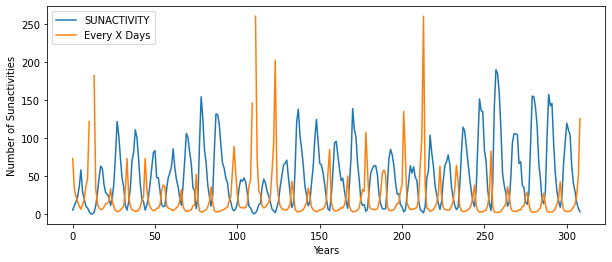

In [8]:
fig = plt.figure(figsize=(10,4))
ax = fig.add_subplot(111)
df_sunspots_wd.plot(ax=ax);
legend = ax.legend(loc = 'upper left');
legend.prop.set_size(308);
plt.xlabel('Years')
plt.ylabel('Number of Sunactivities')
## There seems to be some type of trend in the sunspot activity as shown below in both the sunactivity line and inversely the sunactivities occuring every X days line.

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
304   NaN
305   NaN
306   NaN
307   NaN
308   NaN
Name: trend, Length: 309, dtype: float64
0     -35.131645
1     -28.837145
2     -22.200645
3     -13.367895
4      -2.306395
         ...    
304    -2.306395
305     5.742105
306    -6.557645
307   -12.180895
308   -20.668395
Name: seasonal, Length: 309, dtype: float64
0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
       ..
304   NaN
305   NaN
306   NaN
307   NaN
308   NaN
Name: resid, Length: 309, dtype: float64
0       5.0
1      11.0
2      16.0
3      23.0
4      36.0
       ... 
304    40.4
305    29.8
306    15.2
307     7.5
308     2.9
Name: SUNACTIVITY, Length: 309, dtype: float64


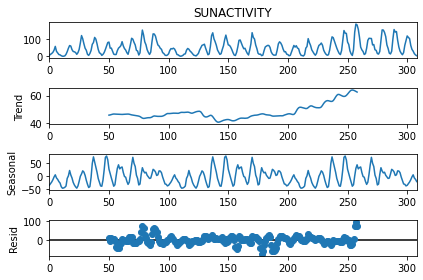

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose
from matplotlib import pyplot
series = df_sunspots['SUNACTIVITY']
result = seasonal_decompose(series, model='additive', period=100)
print(result.trend)
print(result.seasonal)
print(result.resid)
print(result.observed)
result.plot()
pyplot.show()

In [ ]:
# Trend: From this trend graph, we can gather that there is an increasing trend to the number of sunspot activities observed every year given the trend over the past 300 years. Further recording is needed to deduce the variable cause of the increase.
# Seasonality: Given that the data does not carry monthly change data, we cannot deduce if the data has a monthly seasonal trend. However, the seasonality graph indicates that the there seems to be a seasonal pattern every hundred years or so.
# Further research is recommended to determine if this is due to changed recording practices or other variable factors.